In [31]:
!git init
!git add .
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/Ngonidzashe-ux/ImageClassification.git
!git push -u origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /Users/ngoni/Desktop/Fashion_Items_Classification/.git/
[master (root-commit) e8dd017] first commit
 10 files changed, 4109 insertions(+)
 create mode 100644 .ipynb_checkpoints/Infomation-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/MNIST Fashion - FromScratch-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/MNIST Fashion - FromScratchDraft-checkpoint.ipynb
 create mode 100644 .ipynb_checkpoints/MNIST Fashion - MobileNet-checkpoint.ipynb
 create mode 100644

In [22]:
# Import the necessary modules
import numpy as np
import tensorflow
from tensorflow import keras
from keras.utils import to_categorical
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, Input, Dropout
from keras.models import Model

In [23]:
# Load the MNIST Fashion dataset
mnist_images = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist_images.load_data()

(60000, 28, 28)
(10000, 28, 28)


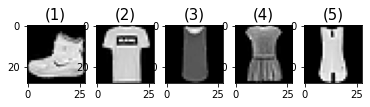

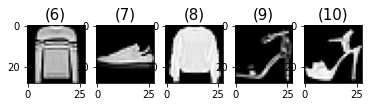

In [24]:
# Display a grid of images from the training set
def show_images(images):
    """
    Display a grid of images with titles.

    Parameters:
    images (list of numpy arrays): List of images to be displayed.
    """
    n_images = len(images)
    titles = ['(%d)' % i for i in range(1, n_images + 1)]
    num = 5
    iter_num = np.ceil(n_images / num).astype(int)
    
    for i in range(iter_num):
        fig = plt.figure()
        sub_images = images[i * num:num * (i + 1)]
        sub_titles = titles[i * num:num * (i + 1)]
        
        for n, (image, title) in enumerate(zip(sub_images, sub_titles)):
            a = fig.add_subplot(1, int(np.ceil(len(sub_images))), n + 1)
            if image.ndim == 2:
                plt.gray()
            
            a.set_title(title, fontsize=15)
            plt.imshow(image)

show_images(x_train[:10])

# Check the format of the images
print(x_train.shape)
print(x_test.shape)

# Normalize pixel values to be between 0 and 1
norm_x_train, norm_x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
encoded_y_train = to_categorical(y_train, num_classes=10, dtype='float32')
encoded_y_test = to_categorical(y_test, num_classes=10, dtype='float32')

# Preprocess images for MobileNetV2
target_size = 96


In [25]:
def preprocess_image(x):
    """
    Preprocesses an image by resizing and converting it to RGB.

    Parameters:
    x (numpy array): Input image to be preprocessed.

    Returns:
    numpy array: Preprocessed image.
    """
    x = resize(x, (target_size, target_size), mode='constant', anti_aliasing=False)
    x = np.stack((x,) * 3, axis=-1)
    return x.astype(np.float32)



In [26]:
# Define a data generator for training
def load_data_generator(x, y, batch_size=64):
    """
    Generates batches of preprocessed data for training.

    Parameters:
    x (numpy array): Input data (images).
    y (numpy array): Output labels.
    batch_size (int): Batch size for training.

    Yields:
    tuple: A tuple containing a batch of preprocessed input data and corresponding output labels.
    """
    num_samples = x.shape[0]
    
    while 1:
        try:
            shuffle(x)
            
            for i in range(0, num_samples, batch_size):
                x_data = [preprocess_image(im) for im in x[i:i + batch_size]]
                y_data = y[i:i + batch_size]
                
                yield shuffle(np.array(x_data), np.array(y_data))
                
        except Exception as err:
            print(err)


In [27]:
# Build the MobileNetV2-based model
def build_model():
    input_tensor = Input(shape=(target_size, target_size, 3))
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_tensor=input_tensor,
        input_shape=(target_size, target_size, 3),
        pooling='avg'
    )
    
    for layer in base_model.layers:
        layer.trainable = True
    
    op = Dense(256, activation='relu')(base_model.output)
    op = Dropout(0.25)(op)
    output_tensor = Dense(10, activation='softmax')(op)

    model = Model(inputs=input_tensor, outputs=output_tensor)

    return model


In [29]:
#convert the labels to one hot encoding
encoded_y_train = to_categorical(y_train, num_classes=10, dtype='float32')
encoded_y_test = to_categorical(y_test, num_classes=10, dtype='float32')


TypeError: fit() got an unexpected keyword argument 'generator'

In [30]:
# Compile the model for training
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train the model using a data generator
train_generator = load_data_generator(norm_x_train, encoded_y_train, batch_size=64)
model.fit_generator(generator=train_generator, steps_per_epoch=5, verbose=1, epochs=2)

# Evaluate the model on a test set using a data generator
test_generator = load_data_generator(norm_x_test, encoded_y_test, batch_size=64)
model.evaluate_generator(generator=test_generator, steps=900, verbose=1)

/var/folders/k2/77s0mbn96lx1rtwdtt0_xy4r0000gn/T/ipykernel_46323/2344023922.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator, steps_per_epoch=5, verbose=1, epochs=2)


Epoch 1/2
5/5 [==============================] - 21s 882ms/step - loss: 1.8149 - categorical_accuracy: 0.4187
Epoch 2/2
5/5 [==============================] - 4s 841ms/step - loss: 0.9175 - categorical_accuracy: 0.7188


/var/folders/k2/77s0mbn96lx1rtwdtt0_xy4r0000gn/T/ipykernel_46323/2344023922.py:11: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(generator=test_generator, steps=900, verbose=1)


900/900 [==============================] - 209s 232ms/step - loss: 4.8365 - categorical_accuracy: 0.1056


[4.836489200592041, 0.10556136816740036]